In [3]:
#Using cv2 for Image reading
#Using Tensorflow for reading CIFAR-10 Dataset
import cv2
import math
import torch
import random
import warnings
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.decomposition import PCA
warnings.filterwarnings("ignore")

#Q1 Convolution function:-



* Importing IITH logo Image to see the working of Convolution function

IITH logo image dimension: (229, 224, 3) 



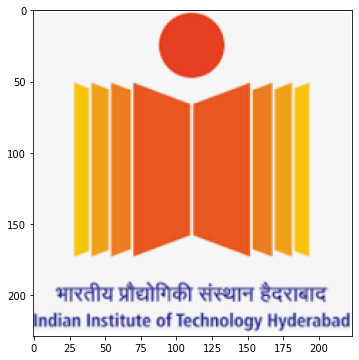

In [4]:
#reading image using cv2
img = cv2.imread("IITH_logo.png",cv2.IMREAD_COLOR)
#Conveting image channel from BGR to RGB because cv2 reads Image in BGR format but we will work on RGB format
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print("IITH logo image dimension:",img_rgb.shape,"\n")

plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.show()

* implementing different different activation functions which we can apply after convolution, as well as we will use them during feed forward pass of neural network in Q-6

In [5]:
np.random.seed(55)
# To use tanh activation function pass Activation = "tanh" as argument
# To use relu activation function pass Activation = "ReLU" as argument 
# To use sigmoid activation function pass Activation = "sigmoid" as argument 
# To use PReLU activation function pass Activation = "PReLU" as argument 

def tanh(x):
  return np.tanh(x)

def ReLU(x):
  return np.maximum(x, 0)

def sigmoid(x):
  # np.nan_to_num will take care of overflow warning which we usually encounted while using exp(x)
  return np.nan_to_num(np.exp(x)) / (1+np.nan_to_num(np.exp(x)))    
  
def PReLU(x):
  return np.maximum(x,0.02*x)


* Below is the implementation of Convolution function which perfoms convolution after performing padding(if specified) on input image using given kernel, stride and Activation
*  <u>Later, this same function we will use again in Convolution Layer Function (Q-3) by calling it repeatedly</u> as per the number of kernel mentioned by user.

In [6]:
np.random.seed(55)

def convolution(img,kernel,stride,padding,activation):
  h,w,d = img.shape
  h_k,w_k,d_k = kernel.shape
  
  #If padding is mentioned then performing padding
  if(padding>0):
    img_padding = np.ones((h+2*padding,w+2*padding,d),dtype=np.int32)
    h_p,w_p,d_p=img_padding.shape
    img_padding[padding:padding+h,padding:padding+w,:]=img
  else:
    h_p,w_p,d_p=img.shape
    img_padding = img
  
  #Creating convolution matrix
  h_conv = math.floor(((h+2*padding-h_k)/stride)+1)
  w_conv = math.floor(((w+2*padding-w_k)/stride)+1)
  conv = np.zeros((h_conv,w_conv),dtype=np.int32)

  #Performing Convolution
  temp = []
  for i in range(0,h_p-h_k+1,stride):
    temp1=[]
    for j in range(0,w_p-w_k+1,stride):
      temp1.append(np.sum(np.multiply(img_padding[i:i+h_k,j:j+w_k,:],kernel)))
    temp.append(temp1)
  conv = np.array(temp)
  
  #Applying activation on convolution output as specified by User activation argument
  if(activation=='ReLU'):
    conv=ReLU(conv)
  
  if(activation=='tanh'):
    conv=tanh(conv)

  if(activation=='sigmoid'):
    conv=sigmoid(conv)

  if(activation=='PReLU'):
    conv=PReLU(conv)

  return conv

Demonstration of above implemented Convolution function using IITH logo image and edge detection kernel

Kernel used :
[[[-1 -1 -1]
  [-1 -1 -1]
  [-1 -1 -1]]

 [[-1 -1 -1]
  [ 8  8  8]
  [-1 -1 -1]]

 [[-1 -1 -1]
  [-1 -1 -1]
  [-1 -1 -1]]]
kernel size: (3, 3, 3)
Original Input image size: (229, 224, 3)
Convolved output size and padding of 10: (247, 242)


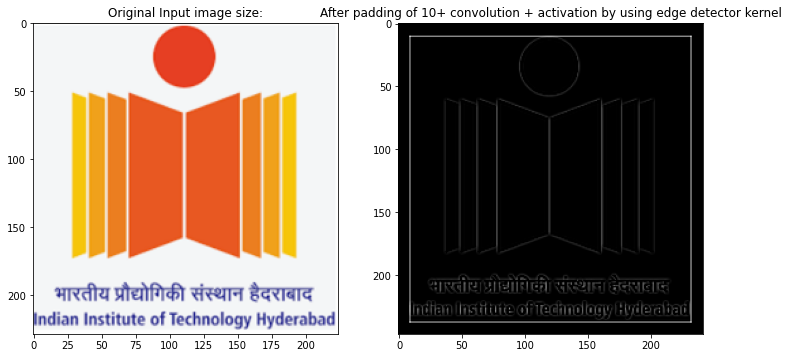

In [7]:
np.random.seed(55)
#Below kernel is used for edge detection
kernel =np.array([
                    [[-1,-1,-1],
                    [-1,8,-1],
                    [-1,-1,-1]],
                  
                    [[-1,-1,-1],
                    [-1,8,-1],
                    [-1,-1,-1]],
                  
                    [[-1,-1,-1],
                    [-1,8,-1],
                    [-1,-1,-1]]
                              ])

kernel=np.transpose(kernel,(1,2,0))



conv=convolution(img_rgb,kernel,stride=1,padding=10,activation="ReLU")
conv = np.array(conv)
print("Kernel used :")
print(kernel)
print("kernel size:",kernel.shape)
print("Original Input image size:",img_rgb.shape)
print("Convolved output size and padding of 10:",conv.shape)


plt.figure(1,figsize=(12,20))
plt.subplot(121)
plt.imshow(img_rgb)
plt.title("Original Input image size:")
plt.subplot(122)
plt.imshow(conv,cmap="gray")
plt.title("After padding of 10+ convolution + activation by using edge detector kernel")
plt.show()

# Q-2 Pooling function:-

* Below cell is the implementation of Pooling function, which performs pooling on given input.
* Function can perform <u>MAX_POOL, MIN_POOL, AVG_POOL specified by user.</u>
* <u>Later, this same function we will use again in Pooling Layer Function (Q-4) by calling it repeatedly</u> as per the number of channels in the convolved input.

In [8]:
np.random.seed(55)
def pooling(img,pool_function,stride):
  h,w = img.shape
  h_pool,w_pool = pool_function['pool_size']
  
  #Code for MAX_POOLING
  if(pool_function['pool_type']=="max"):
    temp = []
    for i in range(0,h-h_pool+1,stride):
      temp1=[]
      for j in range(0,w-w_pool+1,stride):
        temp1.append(np.max(img[i:i+h_pool,j:j+w_pool]))
      temp.append(temp1)
  
  #Code for MIN_POOLING
  if(pool_function['pool_type']=="min"):
    temp = []
    for i in range(0,h-h_pool+1,stride):
      temp1=[]
      for j in range(0,w-w_pool+1,stride):
        temp1.append(np.min(img[i:i+h_pool,j:j+w_pool]))
      temp.append(temp1)
  
  #Code for AVG_POOLING
  if(pool_function['pool_type']=="avg"):
    temp = []
    for i in range(0,h-h_pool+1,stride):
      temp1=[]
      for j in range(0,w-w_pool+1,stride):
        temp1.append(np.average(img[i:i+h_pool,j:j+w_pool]))
      temp.append(temp1)
  
  pool = np.array(temp)
  return pool

* Demonstration of above implemented Pooling function using IITH logo image and performing max pooling, min pooling, avg pooling

Size before pooling: (247, 242)
Size after pooling: (123, 121)


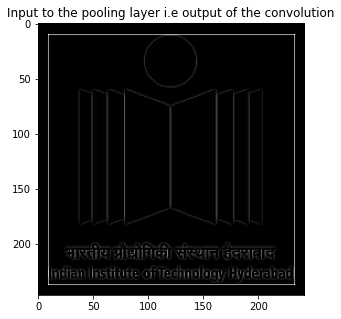

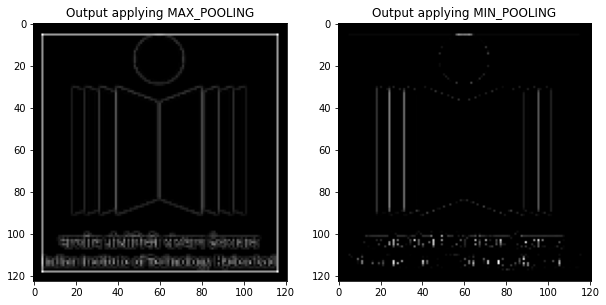

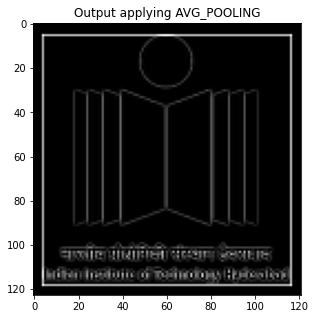

In [9]:
np.random.seed(55)
pool_function_1 = {'pool_type' : "max",
                 'pool_size' : (2,2)}
pool_result_1 = pooling(conv,pool_function_1,stride=2)

pool_function_2 = {'pool_type' : "min",
                 'pool_size' : (2,2)}
pool_result_2 = pooling(conv,pool_function_2,stride=2)

pool_function_3 = {'pool_type' : "avg",
                 'pool_size' : (2,2)}
pool_result_3 = pooling(conv,pool_function_3,stride=2)

print("Size before pooling:",conv.shape)
print("Size after pooling:",pool_result_1.shape)

plt.figure(figsize=(5,5))
plt.imshow(conv,cmap="gray")
plt.title("Input to the pooling layer i.e output of the convolution")
plt.show()

plt.figure(1,figsize=(10,25))
plt.subplot(121)
plt.imshow(pool_result_1,cmap="gray")
plt.title("Output applying MAX_POOLING")
plt.subplot(122)
plt.imshow(pool_result_2,cmap="gray")
plt.title("Output applying MIN_POOLING")
plt.show()
plt.figure(figsize=(5,5))
plt.imshow(pool_result_3,cmap="gray")
plt.title("Output applying AVG_POOLING")
plt.show()



# Q3 Convolution layer function

* Finally, Convolution_layer function which uses convolution function which I have created earlier(Q-1)
* Based on the number of kernel/filter convolution will be performed by repeatly calling Convolution function

In [10]:
np.random.seed(1556)

def convolution_layer(input_volume,num_kernel,kernel_dim,stride,padding,activation):  
  h,w,f = input_volume.shape
  h_k,w_k,d_k = kernel_dim

  h_activation = math.floor(((h+2*padding-h_k)/stride)+1)
  w_activation = math.floor(((w+2*padding-w_k)/stride)+1)
  conv = np.zeros((h_activation,w_activation,num_kernel),dtype=np.int32)

  for i in range(0,num_kernel,1):
    kernel = np.random.randint(-100,100, size=(h_k, w_k,d_k))
    temp=convolution(input_volume,kernel,stride,padding,activation="ReLU")
    conv[:,:,i] = temp

  return conv


* Demonstration of above implemented Pooling function using IITH logo image and performing max pooling, min pooling, avg pooling

Convolution layer function output size: (247, 242, 4)
There will be total 4 Chennel in convolution output:


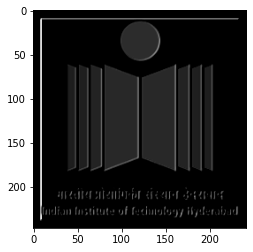

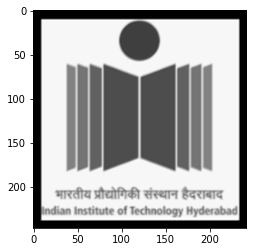

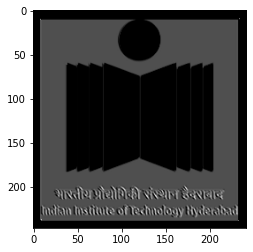

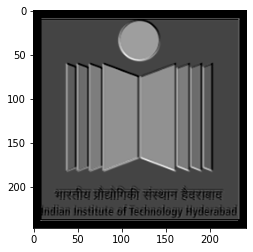

In [11]:
np.random.seed(1254)
num_kernel=4
conv = convolution_layer(img_rgb,4,kernel_dim=(3,3,3),stride=1,padding=10,activation="ReLU")
print("Convolution layer function output size:",conv.shape)
print("There will be total",num_kernel,"Chennel in convolution output:")


plt.imshow(conv[:,:,0],cmap="gray")
plt.show()
plt.imshow(conv[:,:,1],cmap="gray")
plt.show()
plt.imshow(conv[:,:,2],cmap="gray")
plt.show()
plt.imshow(conv[:,:,3],cmap="gray")
plt.show()

# Q4 Pooling layer function:

* Finally, pooling_layer function which uses pooling function which I have created earlier(Q-2)
* Based on the number of output channel in convolution output,pooling will be performed by repeatly calling pooling function

In [12]:
np.random.seed(55)
# This will  take care of GAP also
def pooling_layer(conv_out_vol,pool_function,stride):

  h_a,w_a,d_a = conv_out_vol.shape
  h_p,w_p = pool_function['pool_size']
  
  h_after_pool = math.floor(((h_a-h_p)/stride)+1)
  w_after_pool  = math.floor(((w_a-w_p)/stride)+1)
  pooling_result_noGAP = np.zeros((h_after_pool,w_after_pool,d_a),dtype=np.int32)
  pool_result_GAP = []

  if(pool_function['pool_type'] == 'GAP'):
    for i in range(0,d_a,1):
      pool_result_GAP.append(np.average(conv_out_vol[:,:,i]))
    pooling_result = np.array(pool_result_GAP)
  else:
    for i in range(0,d_a,1):
      pooling_result_noGAP[:,:,i]=pooling(conv_out_vol[:,:,i],pool_function,2)
    pooling_result = pooling_result_noGAP
  
  return pooling_result

* Demonstration of above implemented Pooling layer function using IITH logo image convolution layer's output.
* For demonstration I am using

1.   Max_Pool
2.   GAP - Global Average Pooling



############################# checking working of MAX_POOL #############################
Pooling layer output size: (123, 121, 4)
We can verify that pooling layer output's size is decreased because of pooling we have performed 


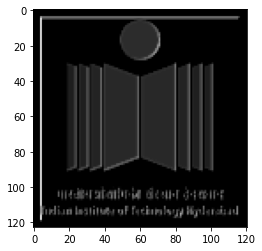

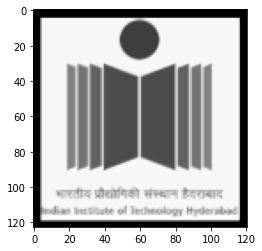

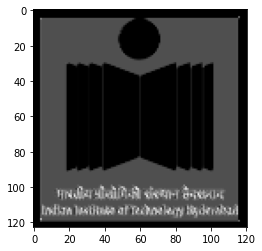

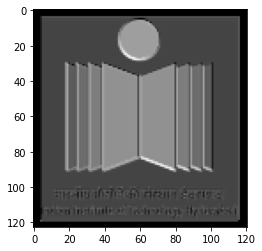

In [13]:
np.random.seed(55)
print("############################# checking working of MAX_POOL #############################")
pool_function = {'pool_type' : "max",
                   'pool_size' : (2,2)}

pooling_result_max = pooling_layer(conv,pool_function,2)

print("Pooling layer output size:",pooling_result_max.shape)
print("We can verify that pooling layer output's size is decreased because of pooling we have performed ")
plt.imshow(pooling_result_max[:,:,0],cmap='gray')
plt.show()
plt.imshow(pooling_result_max[:,:,1],cmap='gray')
plt.show()
plt.imshow(pooling_result_max[:,:,2],cmap='gray')
plt.show()
plt.imshow(pooling_result_max[:,:,3],cmap='gray')
plt.show()

print()



In [14]:
print("############################# checking working of GAP #############################")
pool_function = {'pool_type' : "GAP",
                   'pool_size' : (0,0)}

pooling_result = pooling_layer(conv,pool_function,2)
print(pooling_result.shape)
print("Output of GAP:")
print(pooling_result.reshape(4,1))

############################# checking working of GAP #############################
(4,)
Output of GAP:
[[  6067.99958176]
 [109548.24592632]
 [  8639.75363871]
 [ 19036.61433065]]


# Q5 Flattening Function:

* If you want to perform flattening on GAP output pass output_vector_size = 0 so in that case only reshape will take place.
* In case on max,min,avg pooling you can pass output size you want

In [15]:
def flattening(input_imgvol,output_vector_size=0):
  if output_vector_size != 0:
    input = input_imgvol.reshape(-1,1)
    input_dim = input.shape[0]
    weight = np.random.randn(output_vector_size,input_dim)
    after_flattening = np.dot(weight,input)
  else:
    after_flattening = input_imgvol.reshape(-1,1)
  return after_flattening


* Demonstration of above implemented flattening by performing flattening on pooling layer output.

In [16]:
flattening_output =flattening(pooling_result_max,output_vector_size=0)
flattening_output.shape

(59532, 1)

# Q6 Multilayer Perceptron (MLP) function:

* MLP function which performs forward pass on the input vector and generate the vector of specific size
* In case of CNN this input vector can be GAP pooling
* This will be used again in next layer where we will perform complete CNN forward pass in Q-7

In [17]:
np.random.seed(55)

def softmax(x):
  x = np.array(x,dtype=np.float32)
  m = np.max(x)
  expX = np.nan_to_num(np.exp(x-m))
  return np.nan_to_num(expX /np.sum(expX))

In [18]:
np.random.seed(55)
def MLP(input_vector,num_hidden_layers,size_of_layers,activation,output_size):
  
  number_input = input_vector.shape[0]
  weight = [] 
  bias = []  

  #Initialization all weights and biases
  for i in range(0,num_hidden_layers+1,1):
    
    #creating w0
    if(i == 0):
      weight.append(np.random.randint(-100,100,(number_input,size_of_layers[0])))
      bias.append(np.random.randn(size_of_layers[0],1))

    #creating weight for output layer    
    elif(i == num_hidden_layers):
      weight.append(np.random.randint(-100,100,(size_of_layers[i-1],output_size)))
      bias.append(np.random.randn(output_size,1))
    
    #creating weight for all the hidden layers
    else:
      weight.append(np.random.randint(-100,100,(size_of_layers[i-1],size_of_layers[i])))
      bias.append(np.random.randn(size_of_layers[i],1))
  
  w = np.array(weight, dtype = object)
  b = np.array(bias, dtype = object)
  # print(input_vector.shape)
  #forward propagation
  for i in range(0,num_hidden_layers+1,1):
    
    if(i == 0):
      a = np.dot(w[i].T, input_vector) + b[i]

      if(activation=='ReLU'):
        h=ReLU(a)
      if(activation=='tanh'):
        h=tanh(a)
      if(activation=='sigmoid'):
        h=sigmoid(a)
      if(activation=='PReLU'):
        h=sigmoid(a)

    elif(i == num_hidden_layers):
      y_pred_without_softmax = np.dot(w[i].T, h) + b[i]
      y_pred_with_softmax=softmax(y_pred_without_softmax)
        
    else:
      a = np.dot(w[i].T, h) + b[i]

      if(activation=='ReLU'):
        h=ReLU(a)
      if(activation=='tanh'):
        h=tanh(a)
      if(activation=='sigmoid'):
        h=sigmoid(a)
      if(activation=='PReLU'):
        h=sigmoid(a)
  
  return y_pred_without_softmax,y_pred_with_softmax

* Demonstration of above implemented MLP using any random (10,1) input vector, number of hidden layer 3 with sizes (2,2,3) and output vector size (10,1)

In [32]:
# np.random.seed(55)

# input_vector = np.random.randn(10,1)
input_vector = np.random.randint(-100,100, size=(10,1))
print("input vector size:",input_vector.shape)

y,y_pred = MLP(input_vector,num_hidden_layers=1,size_of_layers=(2,),activation='sigmoid',output_size=10)

print("output vector without softmax:")
print(y)
print("output vector with softmax:")
print(y_pred)

print("Sum of all entries of softmax applied output vector is :",np.sum(y_pred))

input vector size: (10, 1)
output vector without softmax:
[[-83.72283079]
 [ 29.709679  ]
 [ 43.50182178]
 [ 72.94466616]
 [ 27.83577203]
 [ 81.49922808]
 [ 54.31746529]
 [-66.9910468 ]
 [-99.41662333]
 [ 46.93152696]]
output vector with softmax:
[[0.0000000e+00]
 [3.2210705e-23]
 [3.1466798e-17]
 [1.9262639e-04]
 [4.9450633e-24]
 [9.9980742e-01]
 [1.5668478e-12]
 [0.0000000e+00]
 [0.0000000e+00]
 [9.7130041e-16]]
Sum of all entries of softmax applied output vector is : 1.0


# Q-7 Feed-forward path:

* Finally the effective implementation of the feed-forward path, which uses all the functions we have written above.
* Flow of forward pass of CNN


1.   Convolution layer with 16 kernels of size 3 × 3 spatial   dimensions and sigmoid activation.
2.   Max pooling layer of size 2 × 2 with a stride of 2 along each dimension.
3.   Convolution layer with 8 kernels of spatial size 3 × 3 and sigmoid activation.
4.   Max pooling layer of size 2 × 2 with a stride of 2 along each dimension.
5.   A Global Average Pooling (GAP) layer.
6.   An MLP with one hidden layer (size same as input) that accepts as input the previous layer’s
output and maps it to 10 output nodes. Uses sigmoid activation for the MLP (softmax in the
o/p layer).





In [20]:
# np.random.seed(55)
def Feed_forward_CNN(input_img,output_dimension,num_hidden_layers_MLP,size_of_layers):

  conv = convolution_layer(input_img,num_kernel=16,kernel_dim=(3,3,3),stride=1,padding=10,activation="sigmoid")
  # plt.imshow(conv[:,:,1]) 

  pool_function = {'pool_type' : "max",
                   'pool_size' : (2,2)}

  pooling_result = pooling_layer(conv,pool_function,2)

  conv = convolution_layer(pooling_result,num_kernel=8,kernel_dim=(3,3,16),stride=1,padding=10,activation="sigmoid")

  # print(conv.shape)

  pool_function = {'pool_type' : "max",
                   'pool_size' : (2,2)}

  pooling_result = pooling_layer(conv,pool_function,2)

  pool_function = {'pool_type' : "GAP",
                   'pool_size' : (0,0)}

  pooling_result = pooling_layer(pooling_result,pool_function,2)

  temp=pooling_result.shape[0]

  pooling_result = pooling_result.reshape(temp,1)

  y_pred_without_softmax,y_pred_with_softmax = MLP(pooling_result,num_hidden_layers_MLP,size_of_layers,activation='sigmoid',output_size=output_dimension)
  
  return y_pred_without_softmax,y_pred_with_softmax,pooling_result
  # print(y)
  # print(y_pred)
  # print(np.sum(y_pred))

* Demonstration of above implemented Feed_forward_CNN using one of the image from CIFAR10.

170498071/170498071 [==============================] - 11s 0us/step
(array([   29,    30,    35, ..., 49941, 49992, 49994]), array([0, 0, 0, ..., 0, 0, 0]))


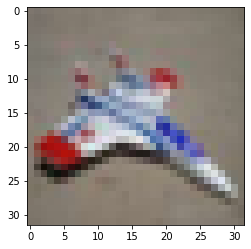

Size of the image: (32, 32, 3)


In [21]:
np.random.seed(55)
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

index = np.where(y_train == 0)
print(index)
#on this particular image of class 0(i.e airplane) I will demonstrat the working of above Feed_forward_CNN
X_train1 = X_train[index[0]]
plt.imshow(X_train1[1])
plt.show()
print("Size of the image:",X_train1[1].shape)



In [33]:
y_pred_without_softmax,y_pred_with_softmax,_ = Feed_forward_CNN(X_train1[1],output_dimension=10,num_hidden_layers_MLP=1,size_of_layers=(4,))
print("output vector without softmax:")
print(y_pred_without_softmax)
print("output vector with softmax:")
print(y_pred_with_softmax)
print("Sum of all entries of softmax applied output vector is:",np.sum(y_pred_with_softmax))


output vector without softmax:
[[ 20.02657453]
 [ 47.97212254]
 [ 75.65188854]
 [ 65.32074508]
 [  0.89391845]
 [ 56.85209884]
 [ 94.94208663]
 [-78.86214138]
 [ 58.78723177]
 [ 56.49315547]]
output vector with softmax:
[[2.9147848e-33]
 [3.9921259e-21]
 [4.1915333e-09]
 [1.3665214e-13]
 [1.4301652e-41]
 [2.8689946e-17]
 [1.0000000e+00]
 [0.0000000e+00]
 [1.9867649e-16]
 [2.0037444e-17]]
Sum of all entries of softmax applied output vector is: 1.0


# Q-8 a) 
Choose an image from each of the 10 classes and display the output vector for each case. Do
you see any trend in the output vectors?

images has total 10 different different images, each one is from one class
(10, 32, 32, 3)


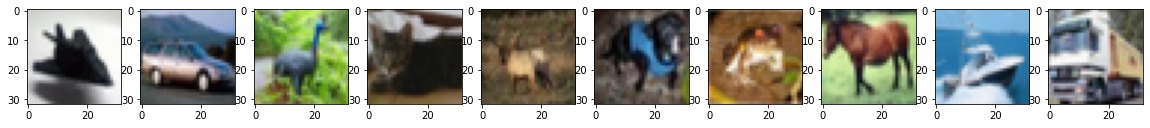

In [23]:
#Selecting 10 images each from one of the 10 classes
images = []
for i in range(0,10,1):
  index = np.array(np.where(y_train == i))
  X_train1 = X_train[index[0]]
  images.append(X_train1[0])

images = np.array(images)
print("images has total 10 different different images, each one is from one class")
print(images.shape)


_, axs = plt.subplots(1, 10, figsize=(20, 20))
axs = axs.flatten()
for img, ax in zip(images, axs):
    ax.imshow(img)
plt.show()

performing CNN forward pass by giving image as input

In [24]:
df = pd.DataFrame({})

prediction = []
for i in range(0,10,1):
  y_pred_without_softmax,y_pred_with_softmax,_ = Feed_forward_CNN(images[i],output_dimension=10,num_hidden_layers_MLP=1,size_of_layers=(4,))
  prediction.append(y_pred_with_softmax)

prediction = np.array(prediction)

df['prediction 0'] = prediction.T[0][0].tolist()
df['prediction 1'] = prediction.T[0][1].tolist()
df['prediction 2'] = prediction.T[0][2].tolist()
df['prediction 3'] = prediction.T[0][3].tolist()
df['prediction 4'] = prediction.T[0][4].tolist()
df['prediction 5'] = prediction.T[0][5].tolist()
df['prediction 6'] = prediction.T[0][6].tolist()
df['prediction 7'] = prediction.T[0][7].tolist()
df['prediction 8'] = prediction.T[0][8].tolist()
df['prediction 9'] = prediction.T[0][9].tolist()



In [25]:
print("Each column pepresent the prediction/outpur vector of one of the images:")
display(df)
print("Sum of all entries of predicted output will be 1 since we have applied softmax:")
display(df.sum(axis = 1, skipna = True))

Each column pepresent the prediction/outpur vector of one of the images:


,prediction 0,prediction 1,prediction 2,prediction 3,prediction 4,prediction 5,prediction 6,prediction 7,prediction 8,prediction 9
0,0.000000e+00,0.000000e+00,4.936932e-31,4.063766e-44,7.999506e-38,2.848900e-36,1.003647e-21,0.000000e+00,0.000000e+00,1.000000e+00
1,1.869055e-11,0.000000e+00,0.000000e+00,1.348670e-21,0.000000e+00,1.000000e+00,1.117113e-23,0.000000e+00,0.000000e+00,0.000000e+00
2,1.000000e+00,0.000000e+00,1.213439e-37,3.305876e-23,0.000000e+00,0.000000e+00,1.528871e-39,0.000000e+00,0.000000e+00,0.000000e+00
3,0.000000e+00,3.673291e-27,0.000000e+00,1.000000e+00,6.733260e-21,9.263246e-31,3.851889e-41,8.536239e-17,4.913538e-32,0.000000e+00
4,1.374245e-01,1.805008e-01,3.452042e-02,7.676020e-02,2.905497e-02,1.105380e-01,2.621486e-01,1.293651e-01,9.656875e-03,3.003068e-02
5,0.000000e+00,1.000000e+00,1.482219e-28,0.000000e+00,0.000000e+00,1.821330e-12,0.000000e+00,0.000000e+00,0.000000e+00,3.746994e-21
6,6.289192e-38,1.960386e-30,0.000000e+00,1.133815e-37,7.061613e-23,0.000000e+00,7.263511e-32,0.000000e+00,3.177820e-25,1.000000e+00
7,0.000000e+00,0.000000e+00,1.000000e+00,2.124057e-12,4.935279e-22,0.000000e+00,0.000000e+00,5.692616e-38,3.377772e-23,9.038375e-43
8,1.000000e+00,0.000000e+00,0.000000e+00,1.365142e-19,0.000000e+00,2.242078e-44,0.000000e+00,0.000000e+00,0.000000e+00,1.741332e-35
9,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


Sum of all entries of predicted output will be 1 since we have applied softmax:


0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
dtype: float64

* **Do you see any trend in the output vectors?**
> NO, there is no any trend in the output vector since we have not trined the network it will not be able to predict anything.

# Q-8 b) 
Visualize (plot) the bottleneck layer (output of flattening layer) using PCA (builtin function) in 2D. Choose three images per class from CIFAR-10.

images has total 30 different different images 3 images from each one class
(30, 32, 32, 3)


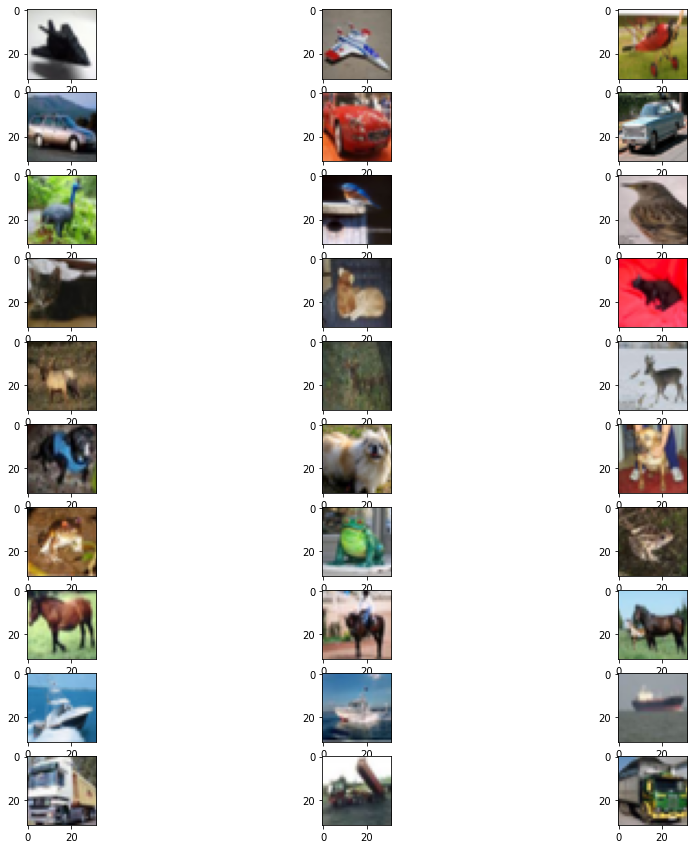

In [26]:
#Selecting 10 images each from one of the 10 classes
images = []
for i in range(0,10,1):
  index = np.array(np.where(y_train == i))
  X_train1 = X_train[index[0]]
  images.append(X_train1[0])
  images.append(X_train1[1])
  images.append(X_train1[2])

images = np.array(images)
print("images has total 30 different different images 3 images from each one class")
print(images.shape)


_, axs = plt.subplots(10, 3, figsize=(15, 15))
axs = axs.flatten()
for img, ax in zip(images, axs):
    ax.imshow(img)
plt.show()


In [27]:
#fetching the bottleneck layer output for each image
bottleneck_output = []
for i in range(0,30,1):
  _,_,GAP_output = Feed_forward_CNN(images[i],output_dimension=10,num_hidden_layers_MLP=1,size_of_layers=(4,))
  bottleneck_output.append(GAP_output)

bottleneck_output = np.array(bottleneck_output)

In [28]:
print(bottleneck_output.shape)
bottleneck_output = bottleneck_output.reshape(30,8)

(30, 8, 1)


Visualizing (plot) the bottleneck layer (output of flattening layer) using PCA (builtin function) in 2D.

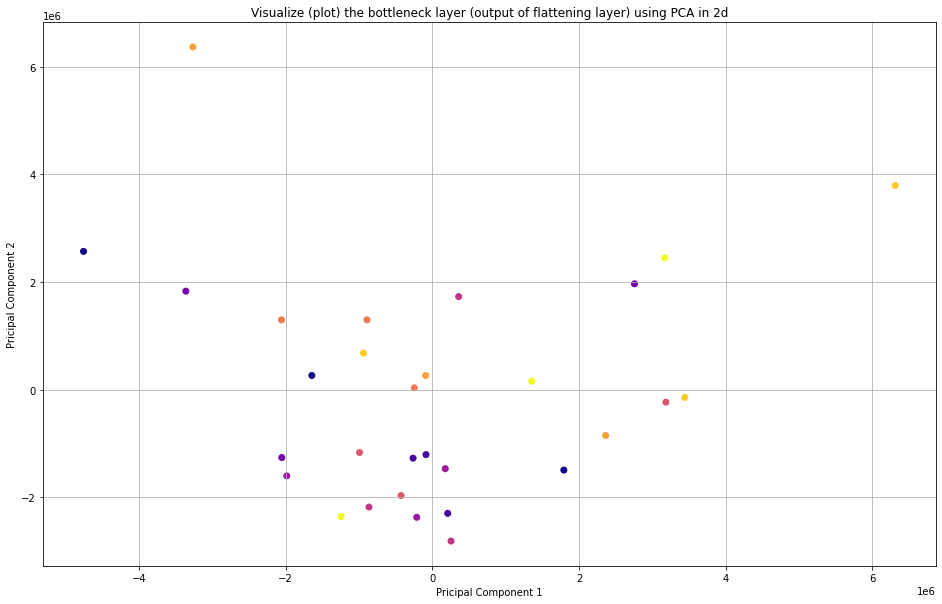

In [29]:
classes = np.arange(0,10).reshape(10,1)
labels = np.repeat(classes,3,axis=0)

pca = PCA(n_components=2)
pca_ = pca.fit_transform(bottleneck_output)

plt.figure(figsize=(16,10))
plt.grid()
colormap = plt.cm.get_cmap('plasma')
plt.scatter(pca_[:,0],pca_[:,1],c=labels, cmap = colormap)
plt.xlabel('Pricipal Component 1',fontsize = 10)
plt.ylabel('Pricipal Component 2',fontsize = 10)
plt.title("Visualize (plot) the bottleneck layer (output of flattening layer) using PCA in 2d")
plt.show()

* Does a randomly initialized network show any discriminability?
-> No,It does since it is not trained
-> but I think after traning if we plot PCA then we will be able to discriminate and we will be able to see the images from same classes near to each other on same color